In [1]:
import pandas as pd
import plotly
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

data=pd.read_csv('data/churn.csv', sep = ',')

data.drop(columns=['RowNumber'], inplace=True)

data['Type']=data['Exited']
values = {1: 'ушедший клиент',0 : 'лояльный клиент'}
data['Type']=data['Type'].replace(values)
#display(data)




In [2]:
# 9.1 Соотношение ушедших и лояльных клиентов

values = ['лояльные клиенты','ушедшие клиенты']

fig1 = px.pie(values=data['Exited'].value_counts(), names=values, 
    title='Соотношение ушедших и лояльных клиентов')
fig1.show()


Доля лояльных криентов превышает долю ушедших клиентов. Почти каждый пятый от общего числа клиентов, представленных в базе данных, является ушедшим. 

In [3]:
# 9.2 Распределение баланса пользователей
df2=data[data['Balance'] > 2500]

fig2 = px.histogram( x=df2['Balance'], height=500, width=1100, 
    title='Распределение баланса пользователей',
    )
fig2.update_layout(yaxis_title='Число пользователей (в том числе и ушедших)', xaxis_title='Баланс на счете, $')
fig2.show()

Распределение близко к нормальному. Большинство пользователей, на счете которых более 2500, имеет баланс 122-124 тыс $.

<AxesSubplot:title={'center':'Характеристики баланса клиентов'}, xlabel='Type', ylabel='Баланс на счете, $'>

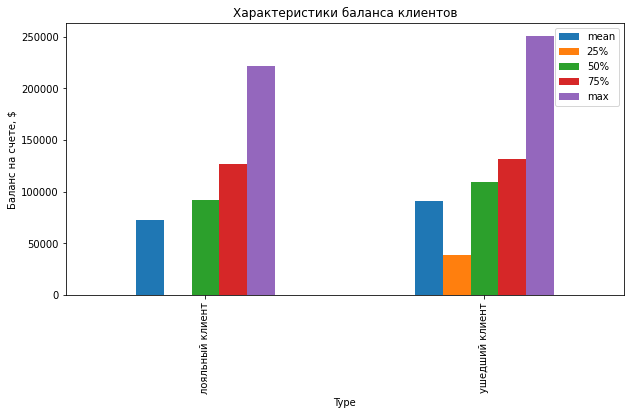

In [4]:
# 9.3 Распределение баланса пользователей в зависимости от оттока

# Изучение баланса  каждого клиента "в лоб" не является результативным из-за достаточно большого объема данных.
# Рассмотрим некоторые статистические показатели каждой из двух категорий пользователей.


df3=data.groupby('Type')['Balance'].describe().round()
#display(df3)
df3.drop(columns=['count','min','std'], inplace=True)    
df3.plot.bar(figsize=(10, 5), title='Характеристики баланса клиентов', ylabel='Баланс на счете, $')



Среднее, максимальное и медианное значение баланса на счете у ушедших пользователей немного выше.
Но при первом приближении можно сказать, что представленные на графике показатели одинаковы для каждой из категорий клиентов. Искючение составляет 25% квантиль. Логично предположить, что некоторых ушедших клиентов не устраивали условия для баланса на счете до 39000 $. 
 





Text(0.5, 0, 'Возраст')

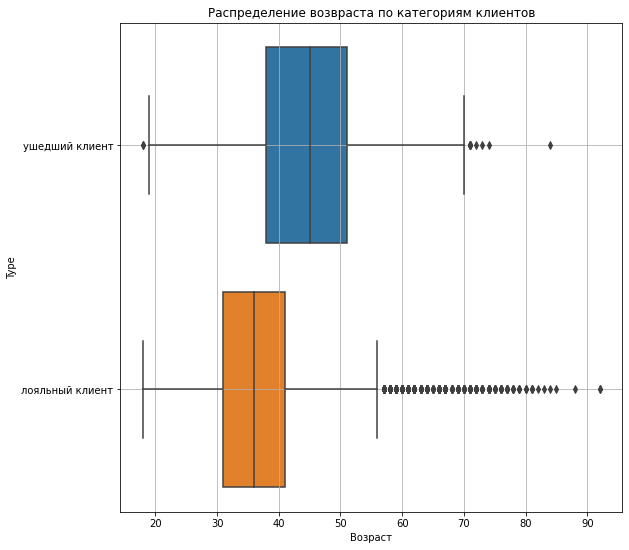

In [5]:
# 9.4 Возраст пользователей в зависимости от оттока

fig4 = plt.figure(figsize=(9, 9))
boxplot = sns.boxplot(data=data, y='Type', x='Age', orient='h')
boxplot.grid()
boxplot.set_title('Распределение возвраста по категориям клиентов')
boxplot.set_xlabel('Возраст')



В категории лояльных клиентов потенциальных выбросов, оцениваемых по коробчатой диагармме, больше.

Следует обратить внимание на группу клиентов от 40 до 50 лет - таких клиентов ушло больше. Или, говоря более тонко, следует обратить внимание старших, т.к. ушедшие клиенты, как правило, старше.

<AxesSubplot:xlabel='EstimatedSalary', ylabel='CreditScore'>

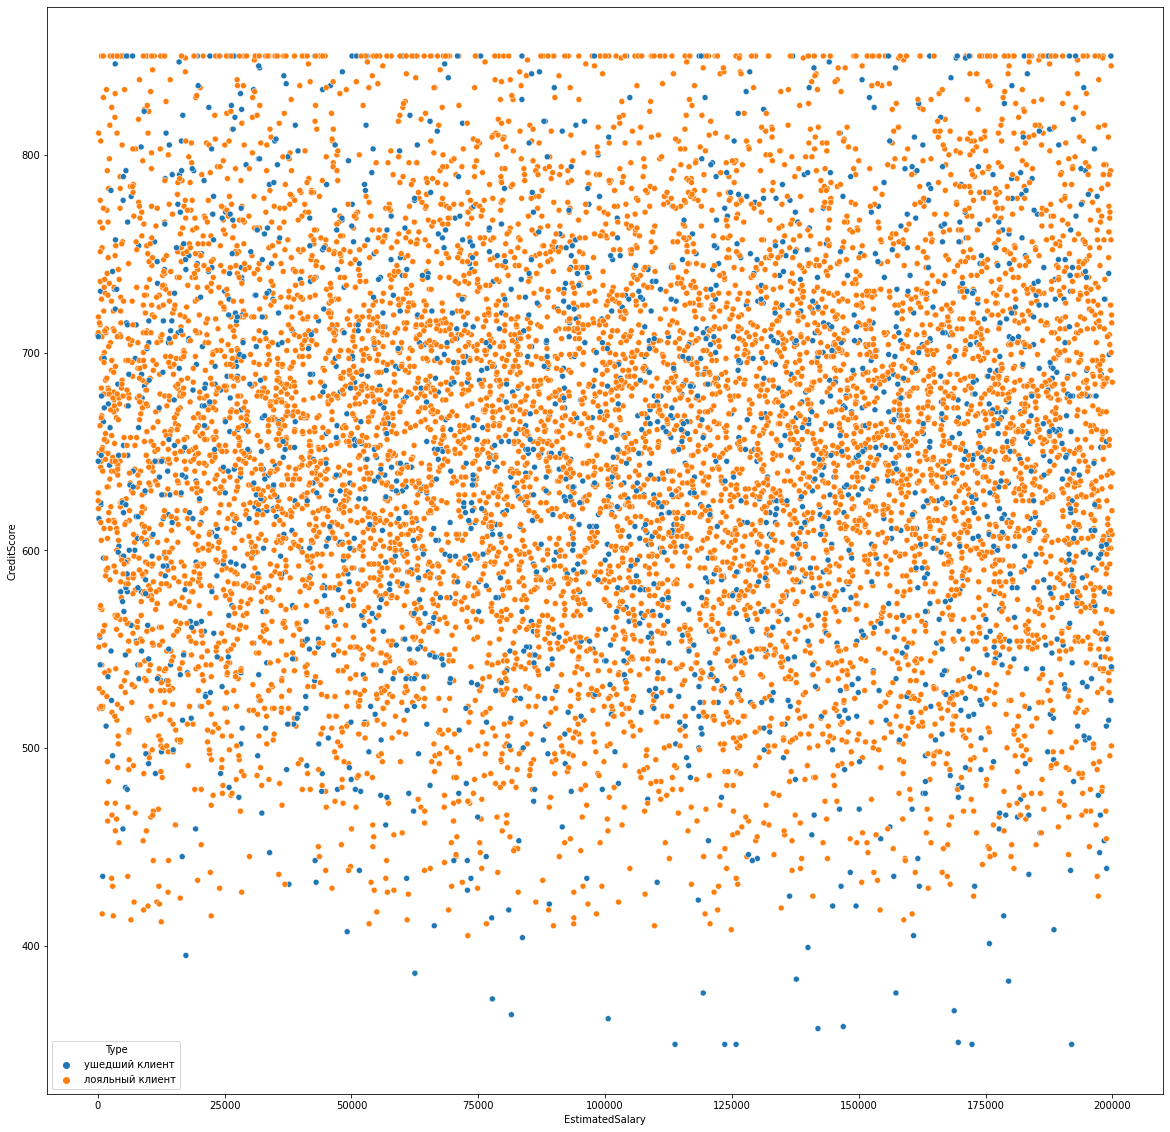

In [13]:
# 9.5 Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. 

fig5 = plt.figure(figsize=(20, 20))
sns.scatterplot(data=data, x='EstimatedSalary', y='CreditScore', hue='Type') 

#log scale:
#splot= sns.scatterplot(....)
#splot.set(xscale="log")

Красиво, но связи между указанными признаками не прослеживается.

In [7]:
# 9.6 Кто чаще уходит, мужчины или женщины? 

df61=data.groupby('Type')['Gender']
display(df61.value_counts()) #Наглядней же

df62=[1139, 898]
names=['Female','Male']
fig6 = px.pie(values=df62, names=names, title='Соотношение ушедших клиентов по половому признаку')
fig6.show()

Type             Gender
лояльный клиент  Male      4559
                 Female    3404
ушедший клиент   Female    1139
                 Male       898
Name: Gender, dtype: int64

Чаще уходят женщины. Такие уж они... Шутка. 
Говоря често, соотношение примерно одинаковое.

Text(0.5, 0, 'Количество приобретенных продуктов')

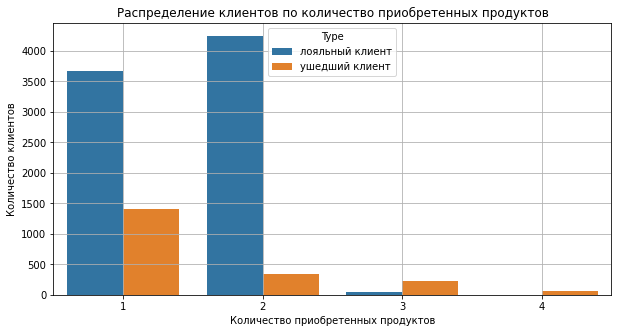

In [8]:
# 9.7 Как отток клиентов зависит от числа приобретённых у банка услуг? 


from re import X


df7=data.groupby(['Type','NumOfProducts'],as_index=False).count()

fig7 = plt.figure(figsize=(10, 5))
barplot7=sns.barplot(data=df7, x='NumOfProducts', y='Exited', hue='Type')
barplot7.grid()
barplot7.set_title('Распределение клиентов по количество приобретенных продуктов')
barplot7.set_ylabel('Количество клиентов')
barplot7.set_xlabel('Количество приобретенных продуктов')

Отток клиентов от числа приобретённых у банка услуг обратно пропорционален. Лояльным клиентам хватает двух приобретенных продуктов. 

Большинство ушедших клиентов уходит после первого же приобретенного продукта.

Для удержания клиентов не следует разрабатывать больше продуктов.

Text(0.5, 0, 'Статус клиента (0 - пассивный, 1 - активный)')

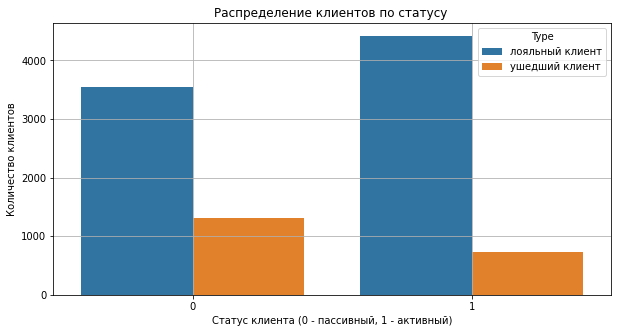

In [9]:
# 9.8 Как влияет наличие статуса активного клиента на отток клиентов? 


df8=data.groupby(['IsActiveMember','Type'], as_index=False).count()

fig8 = plt.figure(figsize=(10, 5))
barplot8=sns.barplot(data=df8, x='IsActiveMember', y='Exited', hue='Type')

barplot8.grid()
barplot8.set_title('Распределение клиентов по статусу ')
barplot8.set_ylabel('Количество клиентов')
barplot8.set_xlabel('Статус клиента (0 - пассивный, 1 - активный)')

Среди активных клиентов количество и процент ушедших пользователей меньше. 
Следовательно, чтобы пассивные клиенты меньше уходили, их необходимо сделать активными, при этом, как было показано выше, введение нового продукта вряд ли улучшит положение. Поэтому следует каким-то образом модифицировать уже существующие продукты банка, дополнить их опциями, которые предполагают активность.

In [10]:
# 9.9. В какой стране доля ушедших клиентов больше? 

df9=data.pivot_table(values='Exited',index='Geography',columns='Type',aggfunc='count')
df9['Type_rate,%']=round(df9['ушедший клиент']/df9[['ушедший клиент','лояльный клиент']].sum(axis=1)*100)

fig9 = px.choropleth(
    data_frame=df9, 
    locations=df9.index, 
    locationmode = 'country names', 
    color=df9['Type_rate,%'], 
    range_color=[0, 35], 
    title='Global bank situation', 
    width=500, 
    height=500, 
    color_continuous_scale=['blue', 'red'] #палитра цветов
)
fig9.show()


В Испании и Франции доля ушедших клиентов меньше. 

На испанском(португальском) и французском языках говорят в Африке и Южной Америке. Также Испанию и Францию (больше Францию) можно условно классифицировать как "колониальные империи", у которых еще остались территории вне их привычных границ, Германию подобным образом классифицировать нельзя. Это факт, но для выявления корректной взаимосвязи между признаком "коллониальность" и "доля ушедших клиентов" не хватает данных. 

Жители Германии, как принято считать, уделяют внимание мелочам. Возможно, если взглянуть глубже на предлагаемые банком услуги, может оказаться, что предложения конкурентов более выгодны. Таким образом, расчетливые немцы уходят из банка.

Внешняя политика Германии отличается от внешней политики Франции. Испания же будто бы остается в стороне. Возможно причина заключается в международной обстановке. 

Text(0.5, 24.0, 'Количество лет')

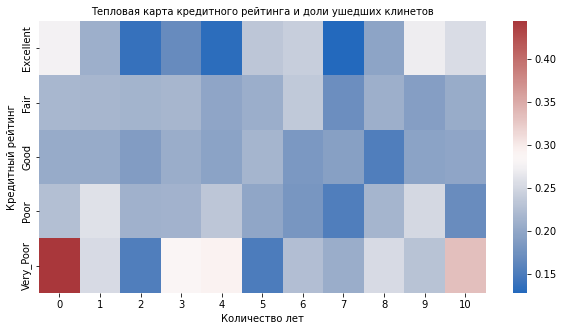

In [11]:
# 9.10 Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

data['CreditScoreCat']=data['CreditScore'].apply(get_credit_score_cat)

df10=data.pivot_table(values='Exited',index='CreditScoreCat',columns='Tenure',aggfunc='mean')
#display(df10)

fig10 = plt.figure(figsize=(10, 5))


heatmap10=heatmap = sns.heatmap(data=df10, cmap='vlag')
heatmap10.set_title('Тепловая карта кредитного рейтинга и доли ушедших клинетов', fontsize=10)

heatmap10.set_ylabel('Кредитный рейтинг')
heatmap10.set_xlabel('Количество лет') 


Скверный кредитный рейтинг и наименьшее (нуль) количество лет с банком - клиент в группе риска!